## Heavy-Tailed Distributions

Most commonly used probability distributions in classical statistics and the natural sciences have either bounded support or light tails.

When a distribution is light-tailed, extreme observations are rare and draws tend not to deviate too much from the mean.

Having internalized these kinds of distributions, many researchers and practitioners use rules of thumb such as “outcomes more than four or five standard deviations from the mean can safely be ignored.”

However, some distributions encountered in economics have far more probability mass in the tails than distributions like the normal distribution.

Examples of heavy-tailed distributions observed in economic and financial settings include:

* the income distributions and the wealth distribution
* the firm size distribution
* the distribution of returns on holding assets over short time horizons 
* the distribution of city sizes
* risk distribution in ARCH or GARCH model

In [7]:
import numpy as np
from scipy.stats import norm, t, beta, lognorm, expon, gamma, uniform, cauchy
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline

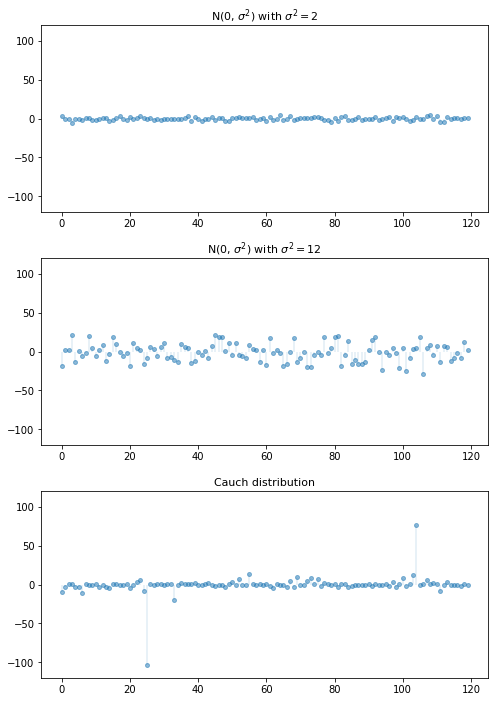

In [27]:
# simulation
n = 120
np.random.seed(11)
distributions = {
    "N(0, $\sigma^2$) with $\sigma^2 = 2$": norm(0, 2),
    "N(0, $\sigma^2$) with $\sigma^2 = 12$": norm(0, 12),
    "Cauch distribution": cauchy()
}

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for ax in axes:
    ax.set_ylim((-120, 120))
axes = axes.flatten()

for i, ax in zip(distributions.keys(), axes):
    data = distributions[i].rvs(n)
    ax.plot(list(range(n)), data, linestyle="", marker="o", alpha=0.5, ms=4)
    ax.vlines(list(range(n)), 0, data, lw=0.2)
    ax.set_title(f"{i}", fontsize=11)
plt.subplots_adjust(hspace=0.25)
plt.show()

[*********************100%***********************]  1 of 1 completed


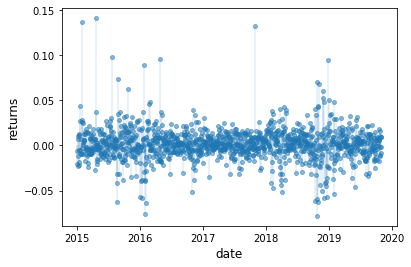

In [28]:
# heavy tails in asset returns
import yfinance as yf
import pandas as pd

s = yf.download('AMZN', '2015-1-1', '2019-11-1')['Adj Close']

r = s.pct_change()

fig, ax = plt.subplots()
ax.plot(r, linestyle="", marker="o", alpha=0.5, ms=4)
ax.vlines(r.index, 0, r.values, lw=0.2)

ax.set_ylabel('returns', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

Five of the 1217 observations are more than 5 standard deviations from the mean.

Overall, the figure is suggestive of heavy tails, although not to the same degree as the Cauchy distribution the figure above.

If, however, one takes tick-by-tick data rather daily data, the heavy-tailedness of the distribution increases further. __I guess that's the charm of stock market and why so many people are trying to beat the market in the short term__.

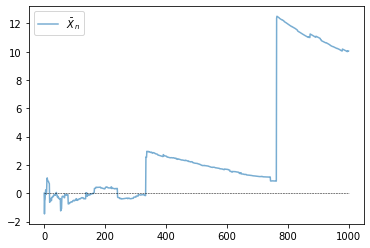

In [30]:
np.random.seed(1234)
N = 1_000
#it's the same as without the underscores. 
#They have underscores there to act as thousand seperators

distribution = cauchy()

fig, ax = plt.subplots()
data = distribution.rvs(N)

sample_mean = np.empty(N)
for n in range(1, N):
    sample_mean[n] = np.mean(data[:n])
    
ax.plot(range(N), sample_mean, alpha=0.6, label='$\\bar X_n$')
ax.plot(range(N), np.zeros(N), 'k--', lw=0.5)
ax.legend()

plt.show()

The sequence shows no sign of converging.Will convergence occur if we take n even larger?

The answer is no.

### Classifying Tail Properties

A distribution $F$ on $R_{+}$ is called __heavy-tailed__ if

$$\int_{0}^\infty exp(tx) F(dx) = \infty \ \ for \ a \ t > 0$$

We say that a nonnegative random variable $X$ is heavy-tailed if its distribution $F(x)$ is heavy-tailed. This is equivalent to stating that its moment generating function $m(t) = E(e^{tX})$ is infinite for all $t > 0$. 

### Pareto Tails

One specific class of heavy-tailed distributions has been found repeatedly in economic and social phenomena: the class of so-called power laws.

Specifically, given $\alpha > 0$, a nonnegative random variable $X$ is said to have a __Pareto tail__ with tail index $\alpha$ if 

$$\lim_{x \to \infty} x^{\alpha} P(X > x) = c $$

Evidently this implies that the existence of positive constants $b$ and $\bar{x}$ such that $P(X > x) \geq b x^{-\alpha}$ whenever $x \geq \bar{x}$. 

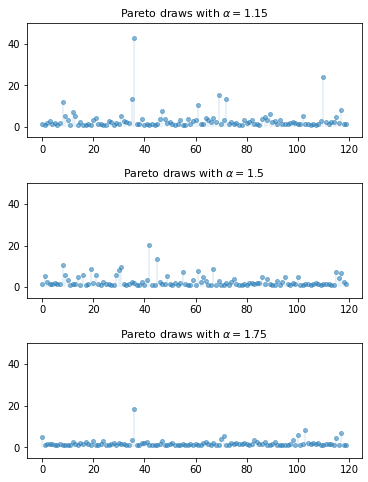

In [31]:
# Pareto simulation


from scipy.stats import pareto

np.random.seed(11)

n = 120
alphas = [1.15, 1.50, 1.75]

fig, axes = plt.subplots(3, 1, figsize=(6, 8))

for (a, ax) in zip(alphas, axes):
    ax.set_ylim((-5, 50))
    data = pareto.rvs(size=n, scale=1, b=a)
    ax.plot(list(range(n)), data, linestyle='', marker='o', alpha=0.5, ms=4)
    ax.vlines(list(range(n)), 0, data, lw=0.2)
    ax.set_title(f"Pareto draws with $\\alpha = {a}$", fontsize=11)

plt.subplots_adjust(hspace=0.4)

plt.show()

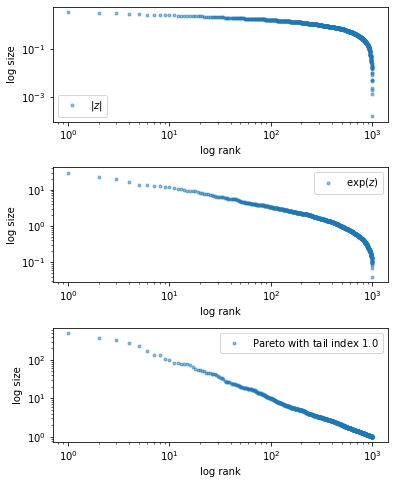

In [32]:
sample_size = 1000
np.random.seed(13)
z = np.random.randn(sample_size)

data_1 = np.abs(z)
data_2 = np.exp(z)
data_3 = np.exp(np.random.exponential(scale=1.0, size=sample_size))

data_list = [data_1, data_2, data_3]

fig, axes = plt.subplots(3, 1, figsize=(6, 8))
axes = axes.flatten()
labels = ['$|z|$', '$\exp(z)$', 'Pareto with tail index $1.0$']

for data, label, ax in zip(data_list, labels, axes):

    rank_data, size_data = qe.rank_size(data)

    ax.loglog(rank_data, size_data, 'o', markersize=3.0, alpha=0.5, label=label)
    ax.set_xlabel("log rank")
    ax.set_ylabel("log size")

    ax.legend()

fig.subplots_adjust(hspace=0.4)

plt.show()

One has to be careful when it comes to model the error with heavy-tailed distribution. 